Skewness Before Transformation:
 Year          -0.005318
Engine_Size   -0.008234
Mileage        0.000919
Doors          0.007527
Owner_Count    0.015677
Price          0.026132
dtype: float64

Skewness After Transformation:
 Year          -0.002335
Engine_Size   -0.093985
Mileage       -0.292710
Doors         -0.076746
Owner_Count   -0.115031
Price         -0.068412
dtype: float64


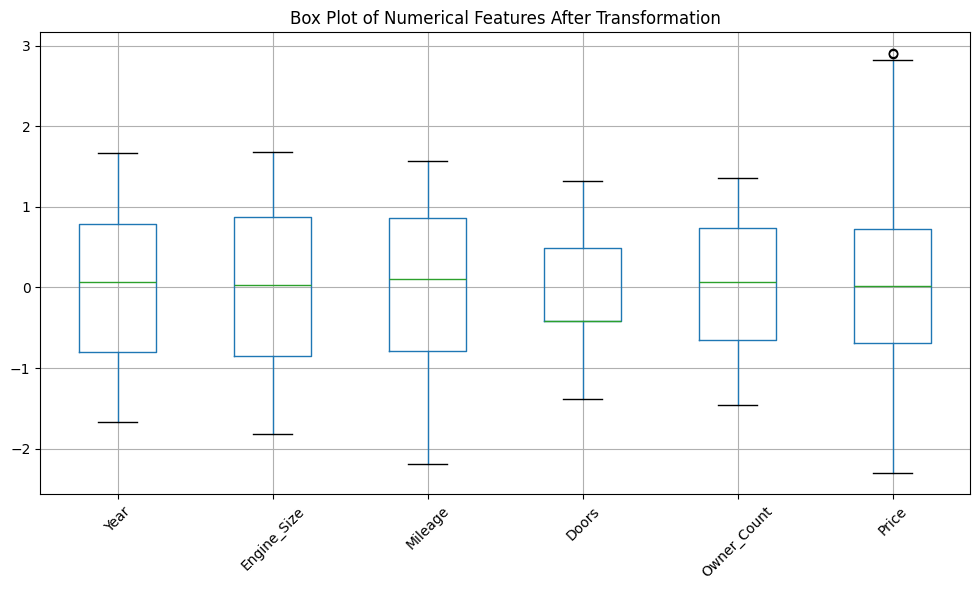

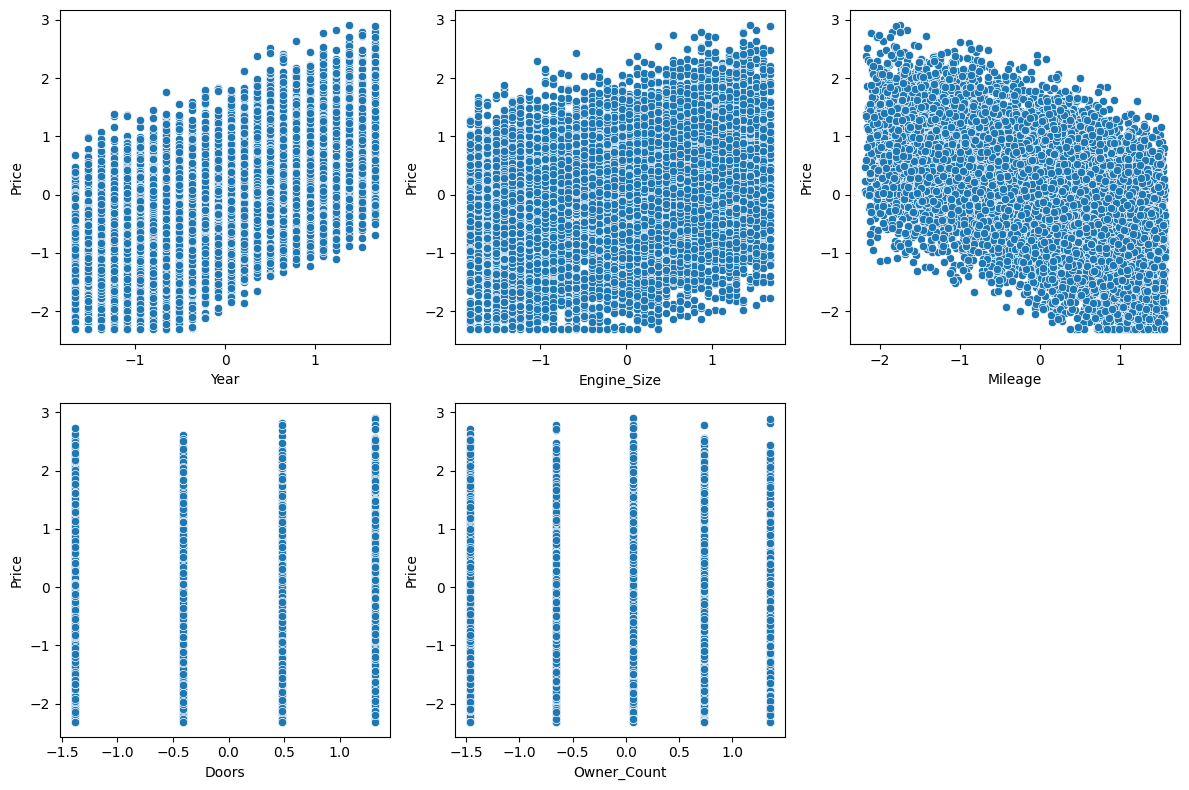


Model: Linear Regression
MAE: 0.2885
MSE: 0.1209
R2 Score: 0.8723

Model: Decision Tree
MAE: 0.4013
MSE: 0.2538
R2 Score: 0.7318

Model: Random Forest
MAE: 0.2986
MSE: 0.1332
R2 Score: 0.8593


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "/content/car_price_dataset.csv"
df = pd.read_csv(file_path)

# Selecting numerical columns
num_cols = ["Year", "Engine_Size", "Mileage", "Doors", "Owner_Count", "Price"]

# Checking skewness before transformation
print("Skewness Before Transformation:\n", df[num_cols].apply(skew))

# Applying power transformation to reduce skewness
pt = PowerTransformer(method='yeo-johnson')
df[num_cols] = pt.fit_transform(df[num_cols])

# Checking skewness after transformation
print("\nSkewness After Transformation:\n", df[num_cols].apply(skew))

# Box plot for numerical features
plt.figure(figsize=(12, 6))
df[num_cols].boxplot(rot=45)
plt.title("Box Plot of Numerical Features After Transformation")
plt.show()

# Scatter plots for numerical features against Price
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols[:-1]):  # Excluding target variable (Price)
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=df[col], y=df["Price"])
    plt.xlabel(col)
    plt.ylabel("Price")
plt.tight_layout()
plt.show()

# Splitting data into training and testing sets
X = df[num_cols].drop(columns=["Price"])
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying three machine learning models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Training and evaluating models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    }

# Display results
for model, scores in results.items():
    print(f"\nModel: {model}")
    for metric, value in scores.items():
        print(f"{metric}: {value:.4f}")


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [6]:
# Load dataset
file_path = "/content/car_price_dataset.csv"
df = pd.read_csv(file_path)


In [8]:
# Handling missing values only in numerical columns
num_cols = df.select_dtypes(include=np.number).columns  # Select numerical columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())  # Fill missing values in numerical columns

In [9]:
# Outlier detection and removal using Z-score
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]

In [10]:
# Selecting numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

In [11]:

# Checking skewness and kurtosis
skewness = df[num_cols].apply(skew)
kurtosis_vals = df[num_cols].apply(kurtosis)
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis_vals)

Skewness:
 Year          -0.005127
Engine_Size   -0.008124
Mileage        0.000753
Doors          0.007846
Owner_Count    0.015824
Price          0.022452
dtype: float64
Kurtosis:
 Year          -1.190508
Engine_Size   -1.196517
Mileage       -1.190763
Doors         -1.341304
Owner_Count   -1.312749
Price         -0.490372
dtype: float64


In [12]:

# Applying power transformation to reduce skewness
pt = PowerTransformer(method='yeo-johnson')
df[num_cols] = pt.fit_transform(df[num_cols])

<ipython-input-12-276c5e04f8af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = pt.fit_transform(df[num_cols])


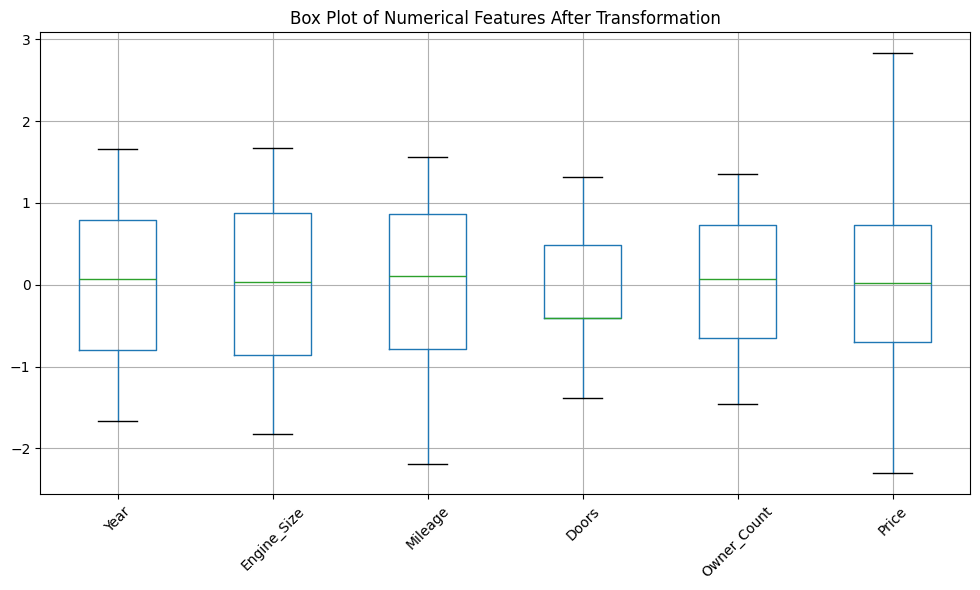

In [13]:
# Box plot visualization
plt.figure(figsize=(12, 6))
df[num_cols].boxplot(rot=45)
plt.title("Box Plot of Numerical Features After Transformation")
plt.show()

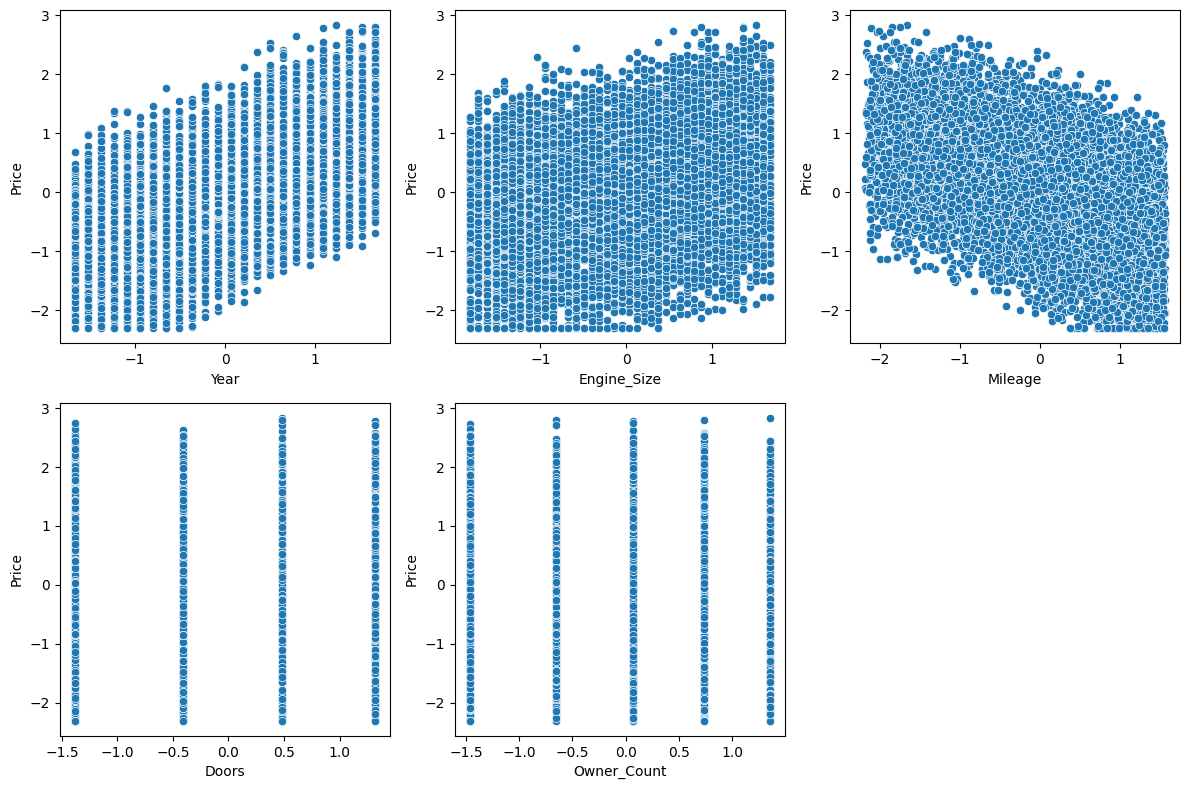

In [14]:
# Scatter plots before and after outlier removal
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols[:-1]):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=df[col], y=df[num_cols[-1]])
    plt.xlabel(col)
    plt.ylabel(num_cols[-1])
plt.tight_layout()
plt.show()

In [15]:

# Splitting data into training and testing sets
X = df[num_cols].drop(columns=[num_cols[-1]])
y = df[num_cols[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:

# Applying regression models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

In [17]:
# Training and evaluating models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    }

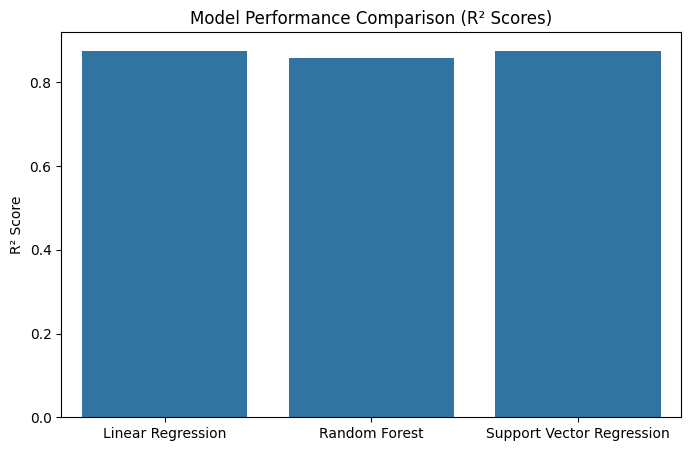

In [18]:
# Performance visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=[r["R2 Score"] for r in results.values()])
plt.title("Model Performance Comparison (R² Scores)")
plt.ylabel("R² Score")
plt.show()


In [19]:
# Display results
for model, scores in results.items():
    print(f"\nModel: {model}")
    for metric, value in scores.items():
        print(f"{metric}: {value:.4f}")


Model: Linear Regression
MAE: 0.2877
MSE: 0.1197
R2 Score: 0.8736

Model: Random Forest
MAE: 0.3024
MSE: 0.1338
R2 Score: 0.8587

Model: Support Vector Regression
MAE: 0.2864
MSE: 0.1180
R2 Score: 0.8754
